In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [39]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [40]:
df.drop(columns=["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm","Date","Location"], inplace=True)

In [41]:
num_cols = df.select_dtypes(include=["number"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [42]:
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [43]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [44]:
X = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = model.predict(X_test)

In [49]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8385810532105046
Confusion Matrix:
 [[21503  1169]
 [ 3527  2893]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.71      0.45      0.55      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.82     29092



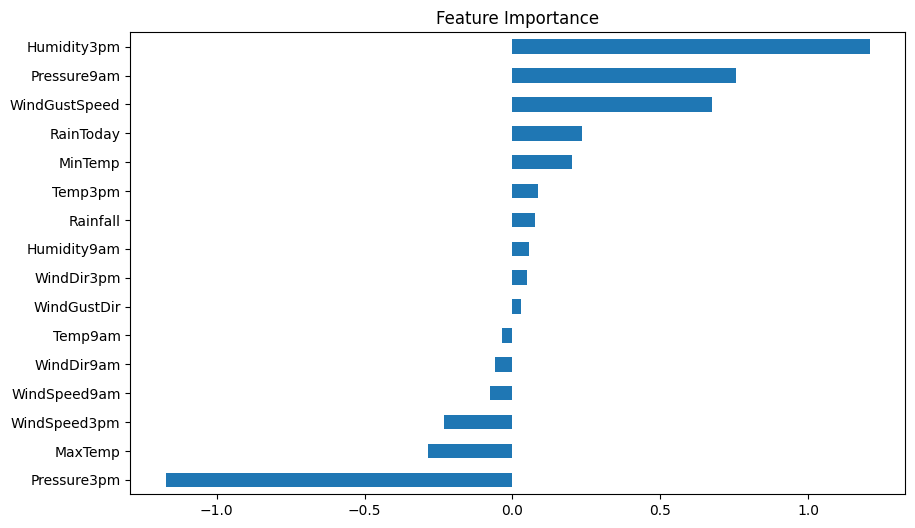

In [50]:
importance = model.coef_[0]
feature_importance = pd.Series(importance, index=df.drop(columns=["RainTomorrow"]).columns)
feature_importance.sort_values().plot(kind='barh', figsize=(10, 6), title='Feature Importance')
plt.show()

In [51]:
print("\nEnter weather details to predict rainfall:")
user_input = []
for feature in X.columns:
    value = float(input(f"Enter {feature}: "))
    user_input.append(value)

user_input = np.array(user_input).reshape(1, -1)
user_input = scaler.transform(user_input)
prediction = model.predict(user_input)

if prediction[0] == 1:
    print("Predicted Rainfall Tomorrow: Yes")
else:
    print("Predicted Rainfall Tomorrow: No")


Enter weather details to predict rainfall:


Enter MinTemp:  12.3
Enter MaxTemp:  25.7
Enter Rainfall:  3.2
Enter WindGustDir:  39.0
Enter WindGustSpeed:  4
Enter WindDir9am:  7
Enter WindDir3pm:  75
Enter WindSpeed9am:  50
Enter WindSpeed3pm:  1010.2
Enter Humidity9am:  1008.4
Enter Humidity3pm:  18.4
Enter Pressure9am:  24.8
Enter Pressure3pm:  15
Enter Temp9am:  20
Enter Temp3pm:  10
Enter RainToday:  1


Predicted Rainfall Tomorrow: Yes


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
